In [2]:
import torch
import torchvision

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [4]:
file_out=pd.read_csv('/content/caravan-insurance-challenge.csv')

In [5]:
file_out

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,test,33,1,2,4,8,0,7,2,0,...,0,0,0,1,0,0,0,0,0,0
9818,test,24,1,2,3,5,1,5,1,3,...,0,0,0,1,0,0,0,0,0,1
9819,test,36,1,2,3,8,1,5,1,3,...,0,0,0,1,0,0,0,1,0,0
9820,test,33,1,3,3,8,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0


In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [7]:
file_out.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [8]:
file_out.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00,...,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00,9822.00
mean,24.25,1.11,2.68,3.00,5.78,0.70,4.64,1.05,3.26,6.19,...,0.00,0.01,0.00,0.57,0.00,0.01,0.03,0.01,0.01,0.06
std,12.92,0.41,0.78,0.80,2.87,1.02,1.72,1.01,1.61,1.90,...,0.07,0.09,0.07,0.56,0.03,0.08,0.21,0.09,0.12,0.24
min,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.00,1.00,2.00,2.00,3.00,0.00,4.00,0.00,2.00,5.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,30.00,1.00,3.00,3.00,7.00,0.00,5.00,1.00,3.00,6.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,35.00,1.00,3.00,3.00,8.00,1.00,6.00,2.00,4.00,7.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,41.00,10.00,6.00,6.00,10.00,9.00,9.00,5.00,9.00,9.00,...,1.00,1.00,2.00,7.00,1.00,2.00,4.00,2.00,2.00,1.00


In [9]:
file_out.nunique()


ORIGIN       2
MOSTYPE     40
MAANTHUI     9
MGEMOMV      6
MGEMLEEF     6
            ..
APLEZIER     3
AFIETS       5
AINBOED      3
ABYSTAND     3
CARAVAN      2
Length: 87, dtype: int64

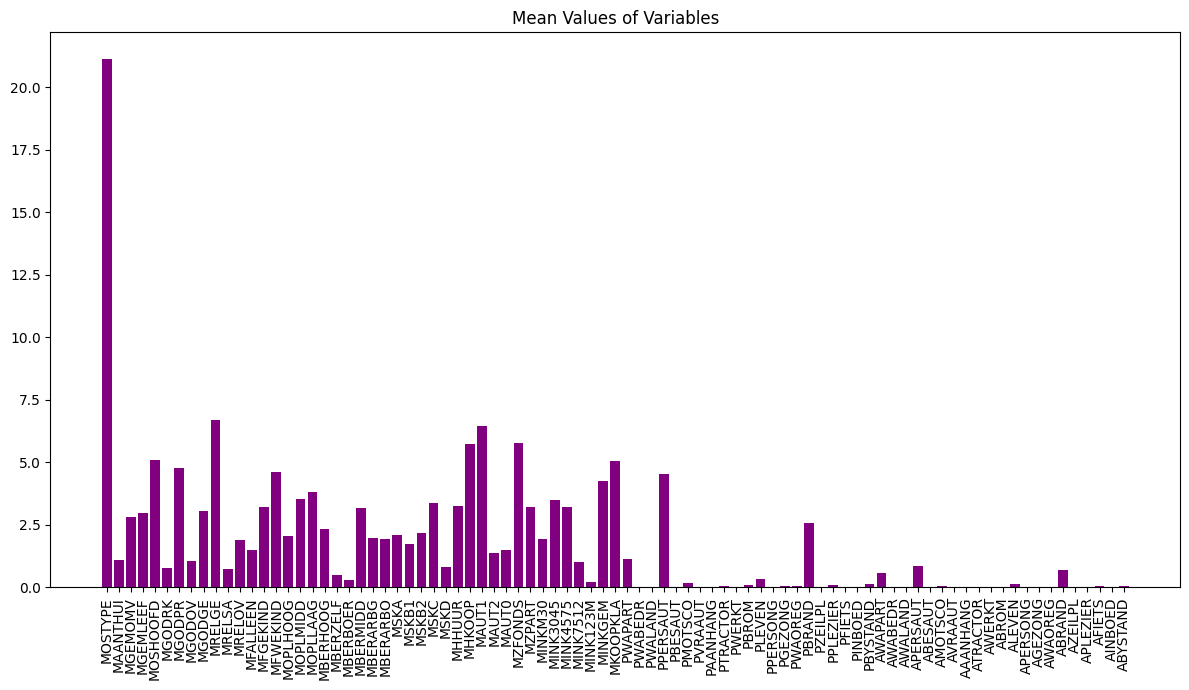

In [10]:
data1 = pd.read_csv('/content/caravan-insurance-challenge.csv')

x=[]
for i in data1.columns:

  if(i !='ORIGIN' and i!='CARAVAN'):
    x.append(i)

df_1 = data1[data1['CARAVAN'] == 1]

y=[]

for i in data1.columns:
  if(i !='ORIGIN' and i!='CARAVAN'):

    y.append(df_1[i])

z=[]
for i in range(0,len(y)):
  z.append(sum(y[i])/len(y[i]))

import numpy as np
import matplotlib.pyplot as plt


# creating the dataset


fig = plt.figure(figsize = (12, 7))

# creating the bar plot
plt.bar(x,z, color ='purple')

plt.title('Mean Values of Variables')
plt.xticks(x, rotation=90)
plt.tight_layout()
plt.show()

In [11]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
print(file_out.shape)
features_with_na=[features for features in file_out.columns if file_out[features].isnull().sum()>1]
if len(features_with_na) == 0:
  print("There is no Missing Values in the data")
## 2- step print the feature name and the percentage of missing values
else:
  for feature in features_with_na:
    print(feature, np.round(file_out[feature].isnull().mean(), 4),  ' % missing values')


(9822, 87)
There is no Missing Values in the data


 The "Origin" feature is unnecessary for our dataset and may be detrimental to model performance. This feature essentially represents the data's classification into training and testing sets, providing no relevant information for the actual prediction task. Therefore, removing this feature is recommended to avoid potential overfitting and improve the model'sgeneralizability to unseen data

In [12]:
# list of numerical variables
numerical_features = [feature for feature in file_out.columns if file_out[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
file_out[numerical_features].head()

Number of numerical variables:  86


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [13]:
!pip install plotly matplotlib seaborn --quiet

In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
import numpy as np
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = file_out.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-15-30b5c13e9540>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = file_out.corr()


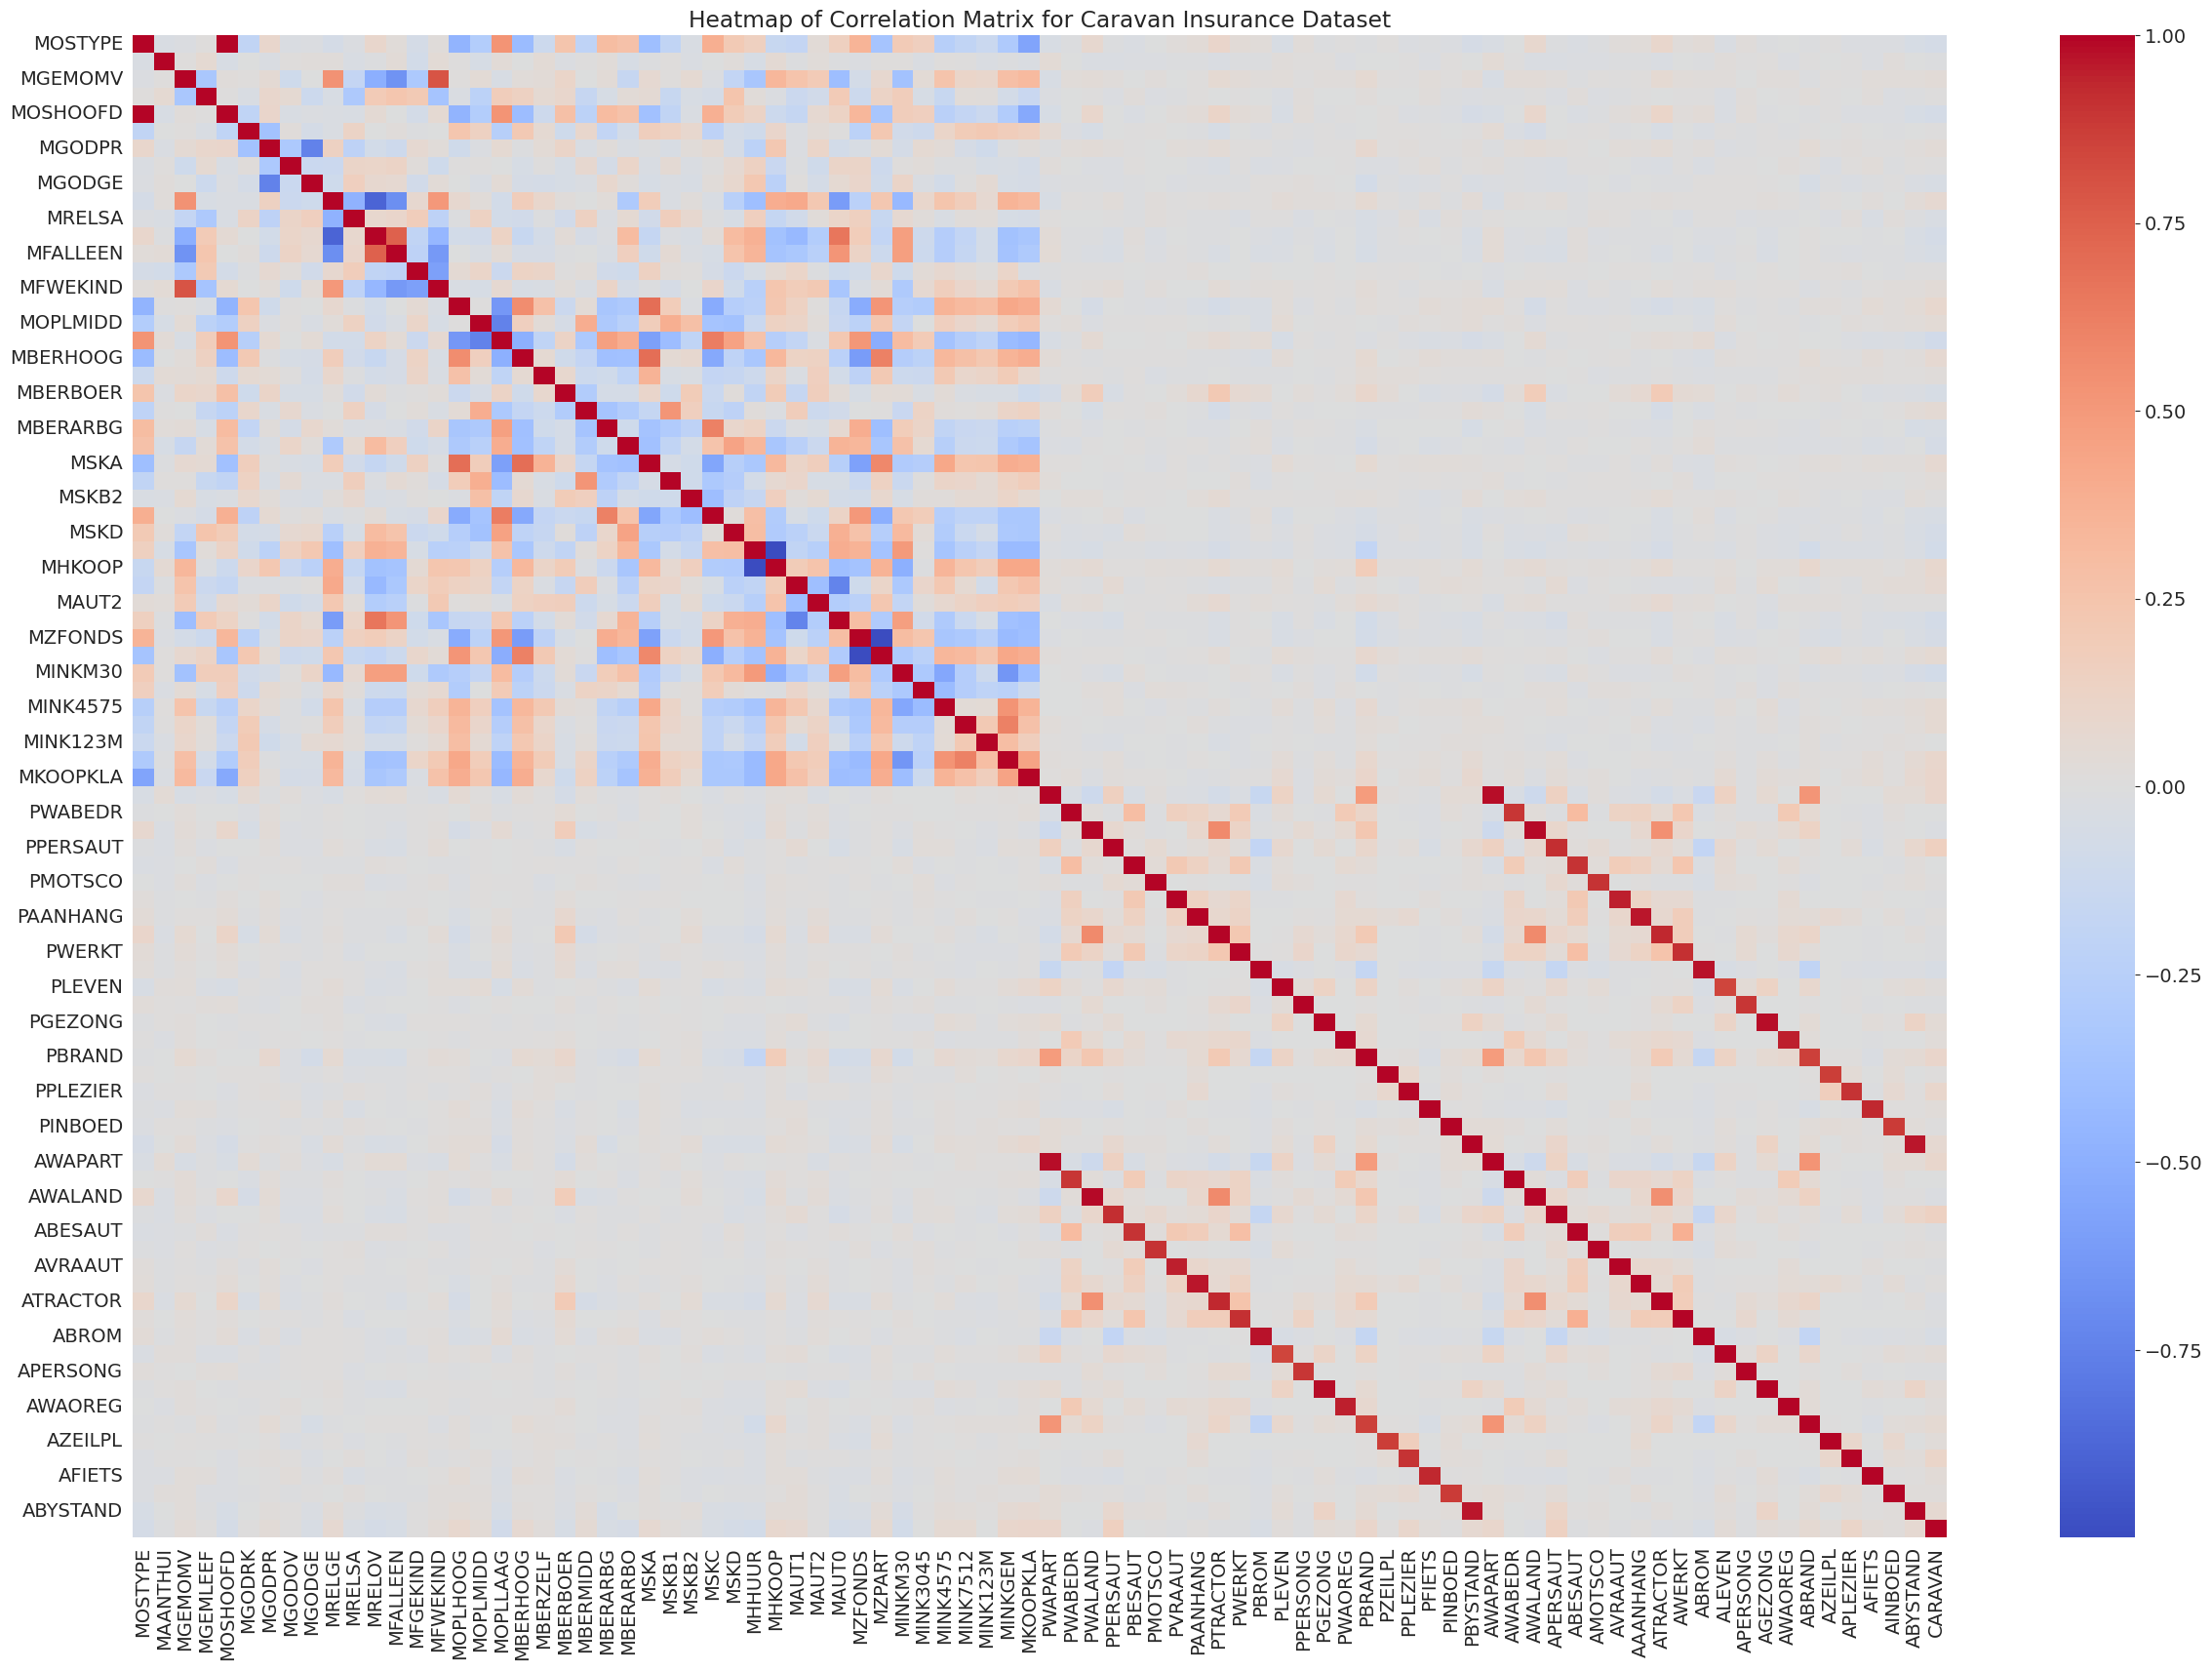

In [16]:
data = pd.read_csv('/content/caravan-insurance-challenge.csv')

train_data = data[data['ORIGIN'] == 'train']

train_data = train_data.drop(columns=['ORIGIN'])


correlation_matrix = train_data.corr()

# Generate the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Heatmap of Correlation Matrix for Caravan Insurance Dataset")
plt.show()

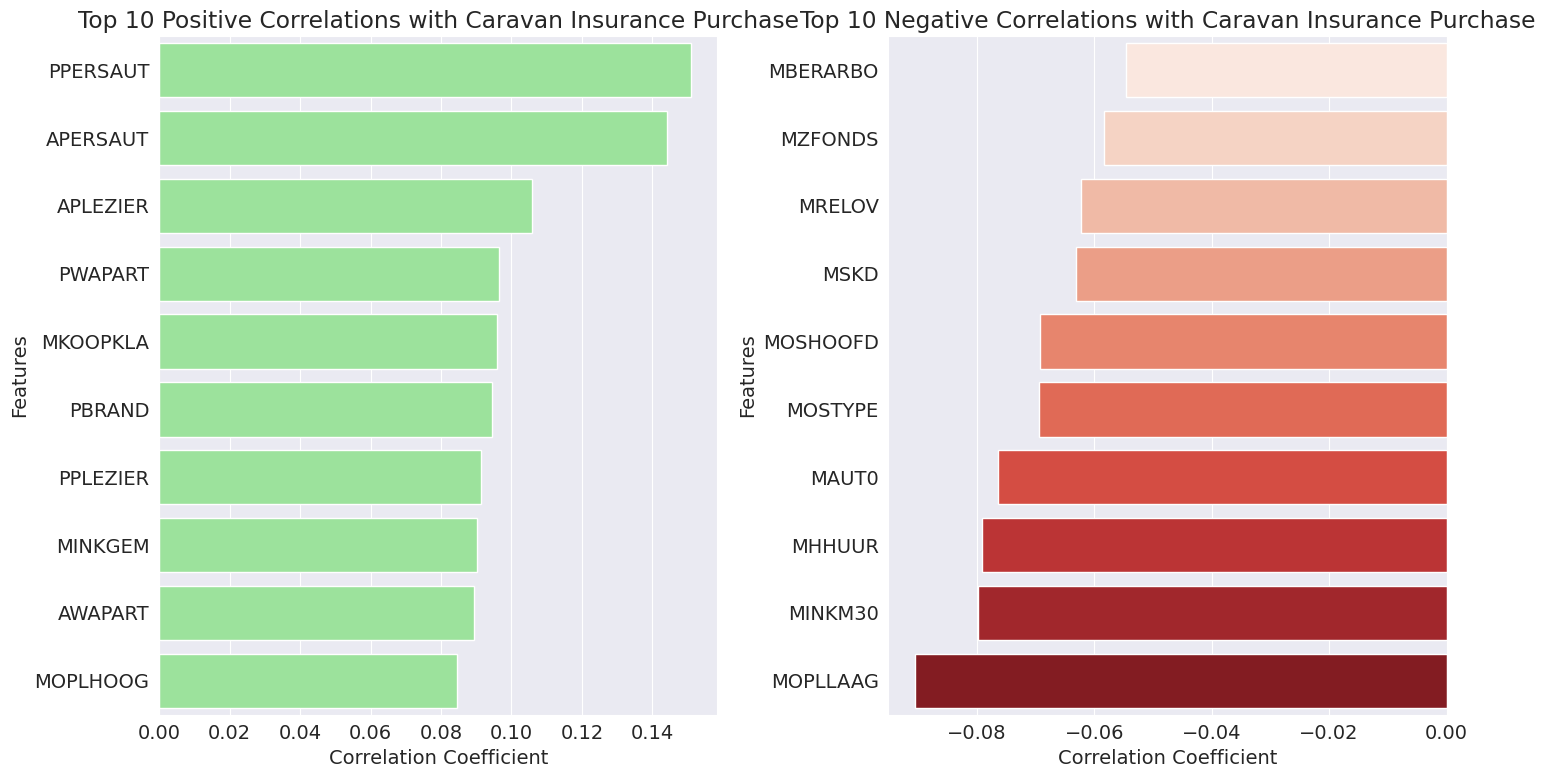

In [43]:
file_path = '/content/caravan-insurance-challenge.csv'
data = pd.read_csv(file_path)


train_data = data[data['ORIGIN'] == 'train']

# Drop the 'ORIGIN' column as it's not a feature
train_data = train_data.drop(columns=['ORIGIN'])

# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Extracting the correlations of the 'CARAVAN' column with other features
caravan_correlations = correlation_matrix['CARAVAN'].sort_values(ascending=False)

# Separating the top 10 positive and negative correlations
top_positive_correlations = caravan_correlations.head(11)[1:]  # Exclude CARAVAN itself
top_negative_correlations = caravan_correlations.tail(10)

# Plotting the bar charts for both positive and negative correlations
plt.figure(figsize=(15, 8))

# Subplot for top positive correlations
plt.subplot(1, 2, 1)
sns.barplot(x=top_positive_correlations.values, y=top_positive_correlations.index, color="lightGreen")
plt.title('Top 10 Positive Correlations with Caravan Insurance Purchase')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Subplot for top negative correlations
plt.subplot(1, 2, 2)
sns.barplot(x=top_negative_correlations.values, y=top_negative_correlations.index, palette="Reds")
plt.title('Top 10 Negative Correlations with Caravan Insurance Purchase')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

# **Logistic Regression Model**

In [17]:
x_train=file_out.iloc[0:5822,1:86].values
y_train=file_out.iloc[0:5822,86].values
x_test=file_out.iloc[5822:,1:86].values
y_test=file_out.iloc[5822:,86].values

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train=torch.tensor(x_train,dtype=torch.float32)
y_train=torch.tensor(y_train)

x_test=torch.tensor(x_test,dtype=torch.float32)
y_test=torch.tensor(y_test)

In [18]:
from torch.utils.data import DataLoader , TensorDataset

In [19]:
x_train[0].shape

torch.Size([85])

In [20]:
train_dataset = TensorDataset(x_train,y_train)
test_dataset = TensorDataset(x_test,y_test)

In [21]:
from torch.utils.data import DataLoader

batch_size = 10

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size)

In [22]:
import torch.nn.functional as F

In [23]:
def binary_accuracy(outputs, labels):
    preds = outputs >= 0  # Use a threshold of 0 to convert logits to class predictions
    return torch.tensor(torch.sum(preds == labels.unsqueeze(1)).item() / len(preds))


In [24]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [25]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [26]:
import torch.nn as nn

In [27]:
class Model(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, 1)  # Single output unit

    def forward(self, xb):
        out = self.linear(xb)  # Linear layer's output to be used with BCEWithLogitsLoss
        return out

    def training_step(self, batch):
        images, labels = batch
        labels = labels.float()
        out = self(images)  # Generate predictions
        loss = F.binary_cross_entropy_with_logits(out, labels.unsqueeze(1))  # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        labels = labels.float()
        out = self(images)  # Generate predictions
        loss = F.binary_cross_entropy_with_logits(out, labels.unsqueeze(1))  # Calculate loss
        acc = binary_accuracy(out, labels)  # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


In [28]:
input_size = 85
model = Model(input_size)

In [29]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 0.6817460656166077, 'val_acc': 0.6067500114440918}

In [ ]:
history1 = fit(15, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6420, val_acc: 0.6797
Epoch [1], val_loss: 0.5536, val_acc: 0.8625
Epoch [2], val_loss: 0.4875, val_acc: 0.9143
Epoch [3], val_loss: 0.4376, val_acc: 0.9307
Epoch [4], val_loss: 0.3992, val_acc: 0.9360
Epoch [5], val_loss: 0.3690, val_acc: 0.9373
Epoch [6], val_loss: 0.3451, val_acc: 0.9382
Epoch [7], val_loss: 0.3258, val_acc: 0.9382
Epoch [8], val_loss: 0.3101, val_acc: 0.9392
Epoch [9], val_loss: 0.2972, val_acc: 0.9395
Epoch [10], val_loss: 0.2863, val_acc: 0.9395
Epoch [11], val_loss: 0.2772, val_acc: 0.9395
Epoch [12], val_loss: 0.2695, val_acc: 0.9395
Epoch [13], val_loss: 0.2629, val_acc: 0.9395
Epoch [14], val_loss: 0.2572, val_acc: 0.9397


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

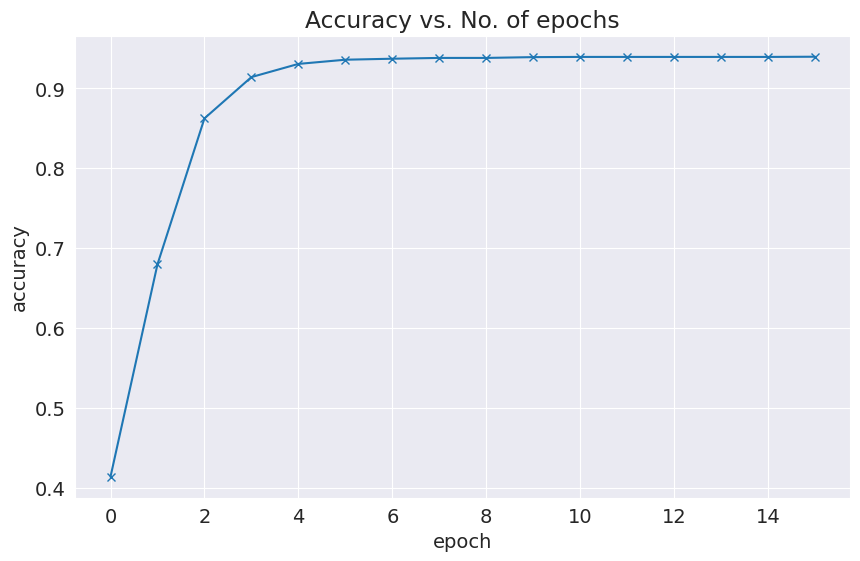

In [ ]:
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Neural Network with one hidden Layer

In [ ]:
x_train=file_out.iloc[0:5822,1:86].values
y_train=file_out.iloc[0:5822,86].values
x_test=file_out.iloc[5822:,1:86].values
y_test=file_out.iloc[5822:,86].values

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train=torch.tensor(x_train,dtype=torch.float32)
y_train=torch.tensor(y_train)

x_test=torch.tensor(x_test,dtype=torch.float32)
y_test=torch.tensor(y_test)

In [ ]:

train_dataset = TensorDataset(x_train,y_train)
test_dataset = TensorDataset(x_test,y_test)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 10

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear1 = nn.Linear(85, 35)
        # output layer
        self.linear2 = nn.Linear(35, 1)

    def forward(self, xb):
        out = self.linear1(xb)  # Linear layer's output to be used with BCEWithLogitsLoss
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out

    def training_step(self, batch):
        images, labels = batch
        labels = labels.float()
        out = self(images)  # Generate predictions
        loss = F.binary_cross_entropy_with_logits(out, labels.unsqueeze(1))  # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        labels = labels.float()
        out = self(images)  # Generate predictions
        loss = F.binary_cross_entropy_with_logits(out, labels.unsqueeze(1))  # Calculate loss
        acc = binary_accuracy(out, labels)  # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


In [ ]:
input_size = 85  # Replace with the actual size of your input features
model = Model(input_size)

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 0.7935712933540344, 'val_acc': 0.13500002026557922}

In [ ]:
history1 = fit(30, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2165, val_acc: 0.9405
Epoch [1], val_loss: 0.2162, val_acc: 0.9405
Epoch [2], val_loss: 0.2159, val_acc: 0.9405
Epoch [3], val_loss: 0.2157, val_acc: 0.9405
Epoch [4], val_loss: 0.2155, val_acc: 0.9405
Epoch [5], val_loss: 0.2152, val_acc: 0.9405
Epoch [6], val_loss: 0.2150, val_acc: 0.9405
Epoch [7], val_loss: 0.2148, val_acc: 0.9405
Epoch [8], val_loss: 0.2147, val_acc: 0.9405
Epoch [9], val_loss: 0.2145, val_acc: 0.9405
Epoch [10], val_loss: 0.2143, val_acc: 0.9405
Epoch [11], val_loss: 0.2142, val_acc: 0.9405
Epoch [12], val_loss: 0.2141, val_acc: 0.9405
Epoch [13], val_loss: 0.2140, val_acc: 0.9405
Epoch [14], val_loss: 0.2139, val_acc: 0.9405
Epoch [15], val_loss: 0.2138, val_acc: 0.9405
Epoch [16], val_loss: 0.2137, val_acc: 0.9405
Epoch [17], val_loss: 0.2136, val_acc: 0.9405
Epoch [18], val_loss: 0.2135, val_acc: 0.9405
Epoch [19], val_loss: 0.2134, val_acc: 0.9405
Epoch [20], val_loss: 0.2134, val_acc: 0.9405
Epoch [21], val_loss: 0.2133, val_acc: 0.940

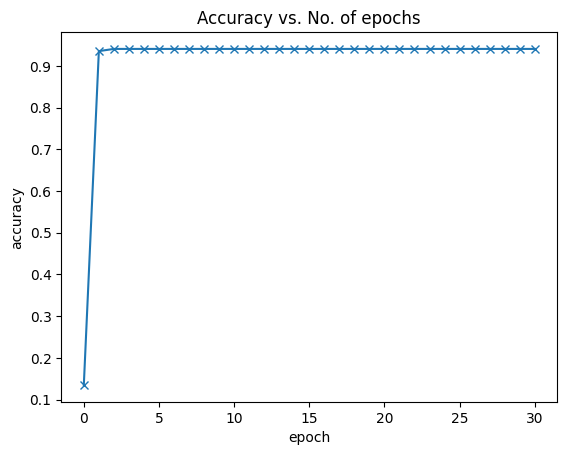

In [ ]:
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Step-Wise Regression

In [30]:
import statsmodels.api as stats

def feature_selection_update_results(data, target,
                                     initial_features=[],
                                     threshold_in=0.01,
                                     threshold_out=0.05,
                                     results=None,
                                     verbose=False):
    if results is None:
        results = []

    selected_features = list(initial_features)
    feature_pvalues = {}

    while True:
        change_made = False

        # Adding features
        potential_features = list(set(data.columns) - set(selected_features))
        new_pvalues = pd.Series(dtype='float64')
        for feature in potential_features:
            model = stats.OLS(target, stats.add_constant(data[selected_features + [feature]])).fit()
            new_pvalues[feature] = model.pvalues[feature]
        min_pvalue = new_pvalues.min()
        if min_pvalue < threshold_in:
            feature_to_add = new_pvalues.idxmin()
            selected_features.append(feature_to_add)
            results.append(feature_to_add)
            feature_pvalues[feature_to_add] = min_pvalue
            change_made = True
            if verbose:
                print(f'Added {feature_to_add} with p-value {min_pvalue:.6f}')

        # Removing features
        model = stats.OLS(target, stats.add_constant(data[selected_features])).fit()
        pvals = model.pvalues.iloc[1:]
        max_pval = pvals.max()
        if max_pval > threshold_out:
            feature_to_remove = pvals.argmax()
            selected_features.remove(feature_to_remove)
            results.remove(feature_to_remove)
            del feature_pvalues[feature_to_remove]
            change_made = True
            if verbose:
                print(f'Removed {feature_to_remove} with p-value {max_pval:.6f}')

        if not change_made:
            break

    # Printing the results
    if verbose:
        print('\nFinal Selected Features and Their P-values:')
        for feature in results:
            print(f'{feature:30} p-value: {feature_pvalues.get(feature, "N/A"):>10}')

    return results

# Usage example
results_list = []
selected_features = feature_selection_update_results(file_out.drop(['ORIGIN', 'CARAVAN'], axis=1),
                                                     file_out['CARAVAN'],
                                                     results=results_list,
                                                     verbose=True)

print('\nSelected Features:')
print(selected_features)


Added PPERSAUT with p-value 0.000000
Added MKOOPKLA with p-value 0.000000
Added PWAPART with p-value 0.000000
Added APLEZIER with p-value 0.000000
Added MOPLHOOG with p-value 0.000004
Added PBRAND with p-value 0.000004
Added MBERBOER with p-value 0.000008
Added MRELGE with p-value 0.000014
Added PWALAND with p-value 0.000361
Added ABRAND with p-value 0.000938
Added AZEILPL with p-value 0.001530
Added MINK123M with p-value 0.001526
Added PBYSTAND with p-value 0.002436
Added PGEZONG with p-value 0.004856
Added AGEZONG with p-value 0.004507
Added MHHUUR with p-value 0.006301

Final Selected Features and Their P-values:
PPERSAUT                       p-value: 2.1468409898937233e-42
MKOOPKLA                       p-value: 1.3673885533208056e-21
PWAPART                        p-value: 3.6671056047380545e-15
APLEZIER                       p-value: 8.207662156625673e-15
MOPLHOOG                       p-value: 4.2523551481018215e-06
PBRAND                         p-value: 3.9282872164675126e-06

significant 16 variables out of 85(With step wise **regression**)

In [31]:
results_list

['PPERSAUT',
 'MKOOPKLA',
 'PWAPART',
 'APLEZIER',
 'MOPLHOOG',
 'PBRAND',
 'MBERBOER',
 'MRELGE',
 'PWALAND',
 'ABRAND',
 'AZEILPL',
 'MINK123M',
 'PBYSTAND',
 'PGEZONG',
 'AGEZONG',
 'MHHUUR']

# Training Neural Network with 16 Variables

In [37]:
x_train=file_out.iloc[0:5822,1:86]
y_train=file_out.iloc[0:5822,86]
x_test=file_out.iloc[5822:,1:86]
y_test=file_out.iloc[5822:,86].values

sc=StandardScaler()

x_train=sc.fit_transform(x_train.filter(items=results_list))
x_test=sc.fit_transform(x_test.filter(items=results_list))

x_train=torch.tensor(x_train,dtype=torch.float32)
y_train=torch.tensor(y_train)

x_test=torch.tensor(x_test,dtype=torch.float32)
y_test=torch.tensor(y_test)

In [38]:
x_train

tensor([[ 1.0374, -0.6160, -0.8046,  ..., -0.0794, -0.0811, -1.0479],
        [-1.0171, -0.1178,  1.2819,  ..., -0.0794, -0.0811, -0.7241],
        [ 1.0374, -0.1178,  1.2819,  ..., -0.0794, -0.0811,  0.8945],
        ...,
        [ 1.0374, -0.6160,  1.2819,  ..., -0.0794, -0.0811,  0.8945],
        [ 1.0374,  0.8788, -0.8046,  ..., -0.0794, -0.0811, -0.7241],
        [-1.0171, -0.6160,  0.2387,  ..., -0.0794, -0.0811,  0.2470]])

In [39]:
train_dataset = TensorDataset(x_train,y_train)
test_dataset = TensorDataset(x_test,y_test)

In [40]:
from torch.utils.data import DataLoader

batch_size = 10

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size)

In [41]:
input_size = 16
model = Model(input_size)

In [42]:
result1 = evaluate(model, val_loader)
result1

{'val_loss': 0.6442732810974121, 'val_acc': 0.6487500071525574}

In [ ]:
history1 = fit(30, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5895, val_acc: 0.7645
Epoch [1], val_loss: 0.5132, val_acc: 0.8782
Epoch [2], val_loss: 0.4559, val_acc: 0.9132
Epoch [3], val_loss: 0.4123, val_acc: 0.9287
Epoch [4], val_loss: 0.3785, val_acc: 0.9353
Epoch [5], val_loss: 0.3519, val_acc: 0.9385
Epoch [6], val_loss: 0.3309, val_acc: 0.9395
Epoch [7], val_loss: 0.3138, val_acc: 0.9400
Epoch [8], val_loss: 0.2999, val_acc: 0.9405
Epoch [9], val_loss: 0.2883, val_acc: 0.9403
Epoch [10], val_loss: 0.2787, val_acc: 0.9407
Epoch [11], val_loss: 0.2705, val_acc: 0.9405
Epoch [12], val_loss: 0.2636, val_acc: 0.9402
Epoch [13], val_loss: 0.2576, val_acc: 0.9402
Epoch [14], val_loss: 0.2525, val_acc: 0.9402
Epoch [15], val_loss: 0.2480, val_acc: 0.9400
Epoch [16], val_loss: 0.2441, val_acc: 0.9400
Epoch [17], val_loss: 0.2406, val_acc: 0.9400
Epoch [18], val_loss: 0.2376, val_acc: 0.9400
Epoch [19], val_loss: 0.2349, val_acc: 0.9400
Epoch [20], val_loss: 0.2325, val_acc: 0.9400
Epoch [21], val_loss: 0.2304, val_acc: 0.940

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

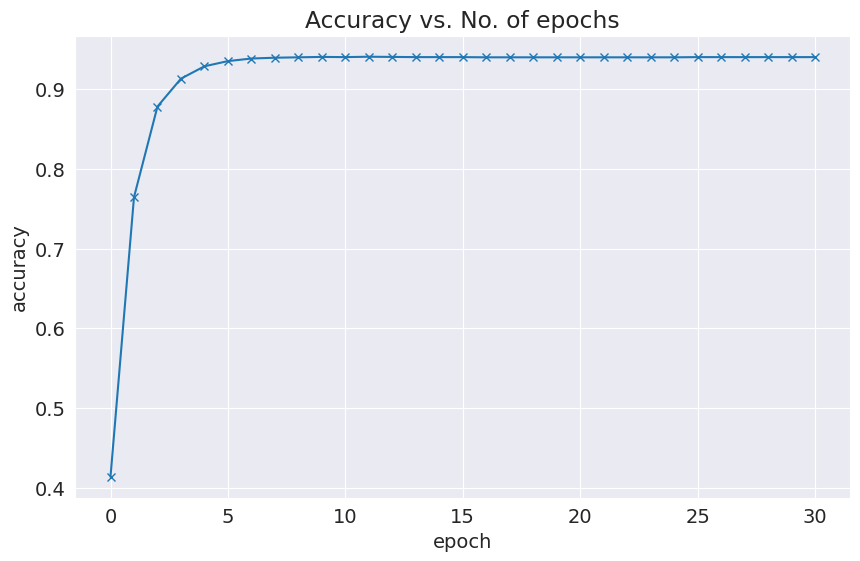

In [ ]:
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

#RandomForest

In [ ]:
x_train=file_out.iloc[:6000,1:86]
y_train=file_out.iloc[:6000,86]
x_test=file_out.iloc[6000:,1:86]
y_test=file_out.iloc[6000:,86]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
rfc.fit(x_train, y_train)


y_pred = rfc.predict(x_test)
print("Random Forest based on feature importance feature selection accuracy: %.3f" %metrics.accuracy_score(y_test, y_pred))

importances = rfc.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

feat_labels = file_out.columns[1:]

Random Forest based on feature importance feature selection accuracy: 0.932


 1) PBRAND                         0.055226
 2) PPERSAUT                       0.042734
 3) APERSAUT                       0.042583
 4) MOSTYPE                        0.037549
 5) PWAPART                        0.028714
 6) MKOOPKLA                       0.024712
 7) ABRAND                         0.022457
 8) AWAPART                        0.021069
 9) MOSHOOFD                       0.021006
10) MOPLMIDD                       0.019272
11) MBERMIDD                       0.019000
12) MFWEKIND                       0.018601
13) MGODGE                         0.018531
14) MGODPR                         0.018200
15) MOPLLAAG                       0.018166
16) MINK3045                       0.017763
17) MFGEKIND                       0.017299
18) MSKC                           0.017218
19) MOPLHOOG                       0.016735
20) MBERARBG                       0.016733
21) MBERARBO                       0.016467
22) MINK4575                       0.015920
23) MBERHOOG                    

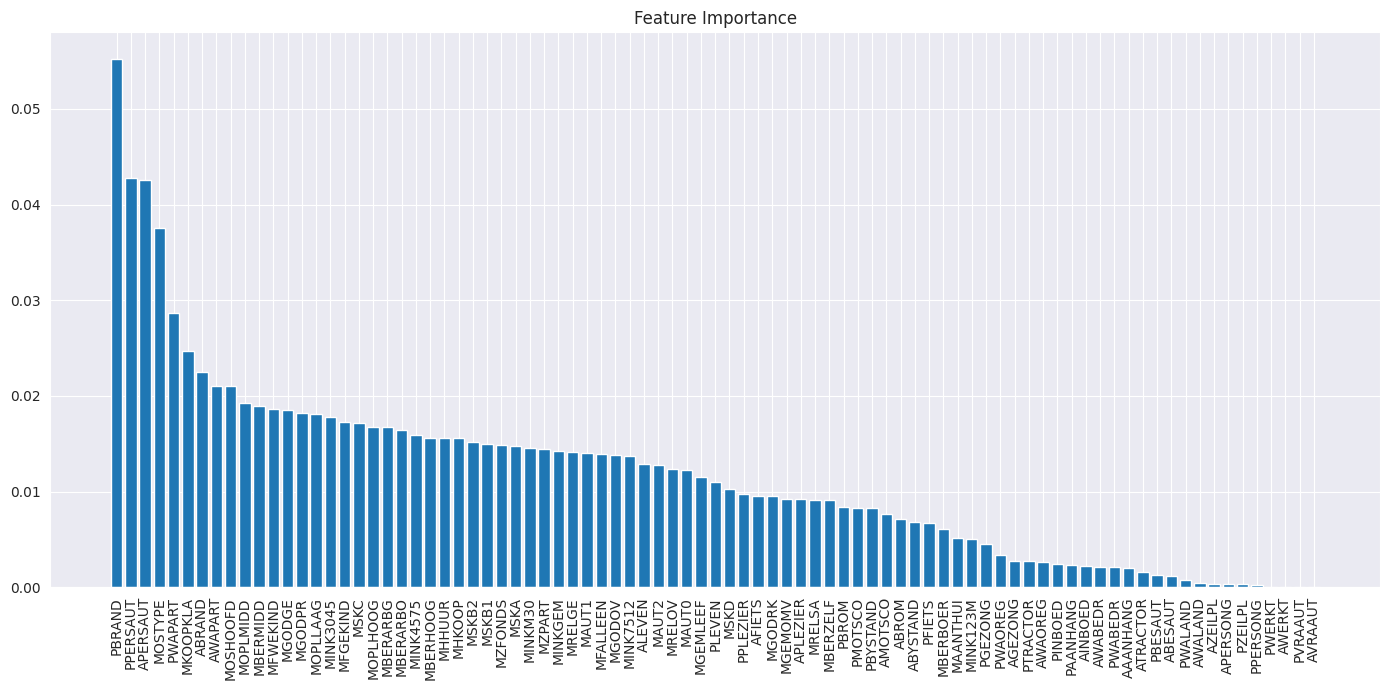

In [ ]:
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
        feat_labels[sorted_indices[f]],
        importances[sorted_indices[f]]))
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(14, 7))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# OVERLAP OF VARIABLES BETWEEN DIFFERENT METHODS

In [ ]:
count = 0
k = feat_labels[sorted_indices]
k = k[:30]
print(k)
res = []
for i in result:
  if i in k:
    res.append(i)
    count +=1
print(res)
print(count)

Index(['PBRAND', 'PPERSAUT', 'APERSAUT', 'MOSTYPE', 'PWAPART', 'MKOOPKLA',
       'ABRAND', 'AWAPART', 'MOSHOOFD', 'MOPLMIDD', 'MBERMIDD', 'MFWEKIND',
       'MGODGE', 'MGODPR', 'MOPLLAAG', 'MINK3045', 'MFGEKIND', 'MSKC',
       'MOPLHOOG', 'MBERARBG', 'MBERARBO', 'MINK4575', 'MBERHOOG', 'MHHUUR',
       'MHKOOP', 'MSKB2', 'MSKB1', 'MZFONDS', 'MSKA', 'MINKM30'],
      dtype='object')
['PPERSAUT', 'MKOOPKLA', 'PWAPART', 'MOPLHOOG', 'PBRAND', 'ABRAND', 'MHHUUR']
7
